# Homework 4 - Decision Trees / Random Forests

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's the same data set as from HW3, so that way you'll be familiar with it.

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival
- Find if there are any important features related to patient survival

In this assignment, we will be using Clustering to identify clusters of patients, then seeing how well the various clustering methods work against the true clusters (classes). A good resource to use would be [Sci-Kit Learn's Clustering info](https://scikit-learn.org/stable/modules/clustering.html)

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW4.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using. Add any you want to use.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own.


In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data to remember what it looks like:

In [2]:
heart_df = pd.read_csv('data_hw4.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Part 1: Visual Analysis

In this HW, since you've had plenty of experience with visual analysis in general and on this data set, we are going to skip this part.

### Part 2: Clustering

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be entirely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

Your checklist of items to do will be as such:

1. Scale the data (5 pts)
2. Split it into training/testing sets (5 pts)
3. Cluster the patients using the 3 methods imported from sklearn.clustering (see above) (40 pts)
- As a note, you'll want to try and optimize the parameters within these models to have good accuracy as well as good generalization (no overfitting). 
- Also, if you can, try and rank your features to get a kind of feature importance (Think about how you might do this. There are multiple ways to do it.)
4. Write a report, which should have ample information on your methods, implementation, results, and various graphs/charts explaining how your model performed. How could you visualize the clusters or how well they performed? What issues might they have? What are some pros and cons of different methods? How well do your clustering results match the true clusters (classes)? The report has the following criteria (50 pts): 
- Should be at LEAST 2-3 paragraphs, and a paragraph is more than just 2-3 sentences.
- Explain your methods, including optimization techniques and WHY you used them
- Contain at LEAST 3 charts/graphs showcasing how well your methods predicted heart disease
- Remember, this is a data science project, so you should be thinking and exploring your data and models. What does the data tell us?

On this HW, it is very difficult to copy your friends, as it will be obvious. Cheating will result in an automatic zero, so make sure your work is original. The point of these HW assignments is for you to think, so if you simply tell me what you did or type definitions of methods to make your report seem long, you will lose points. Each HW assignment is graded in detail.

In [3]:
# Since we skipped part 1 visual analysis, so I will use the important features that I found in HW3
# However, we cannot use binary features b/c it won't do well for clustering
# Assign my chosen features to X and 'death' target for y
X = heart_df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = heart_df['death']

# Scale the x values by using MinMaxScaler
mm_scale = MinMaxScaler()
X_scaled = mm_scale.fit_transform(X)

# Replace these scaled values to our dataframe
X_train = pd.DataFrame(data = X_scaled, columns = X.columns)

# Call head for train_x to return first 5 data values
X_train.head()

,age,ejection_fraction,serum_creatinine,serum_sodium
0,0.636364,0.090909,0.157303,0.485714
1,0.272727,0.363636,0.067416,0.657143
2,0.454545,0.090909,0.089888,0.457143
3,0.181818,0.090909,0.157303,0.685714
4,0.454545,0.090909,0.247191,0.085714


In [4]:
# Now lets start splitting the data, and I am using 0.2 for test size
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

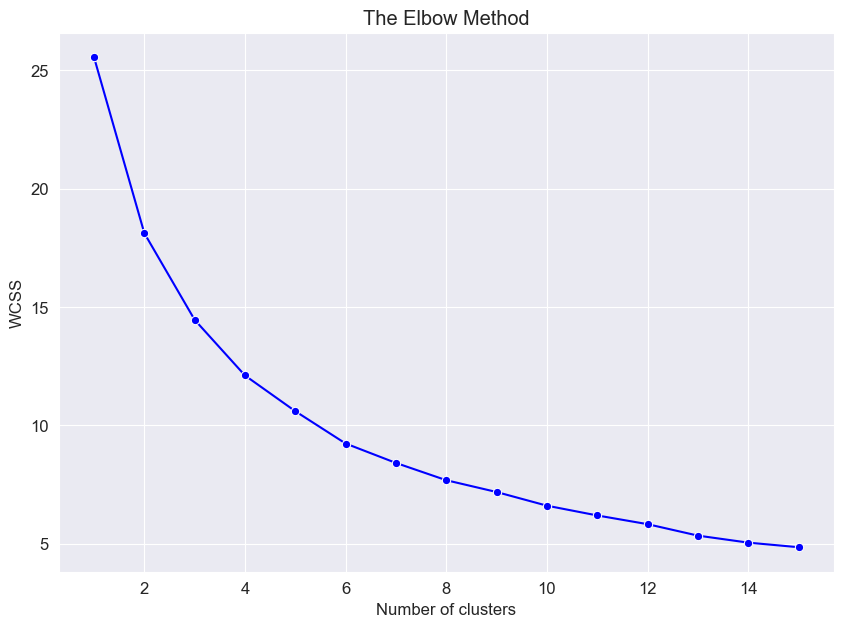

In [5]:
# First, run 16 clusters and then use the elbow method to find optimal k value

# Store the wcss values for plotting later.
wcss = []

# Run the loop for 16 clustering
for k in range(1, 16):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_train)
    # inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)

# Plot the elbow method and find optimal number of clusters
sns.lineplot(x = range(1, 16), y = wcss, marker = 'o', color = 'blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# My best guess Cluster #3 is optimal because it seem at the elbow point
# Now we are ready to create our KMeans model with k = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit_predict(X_train)
km_labels = kmeans.labels_

In [7]:
# The silhoette score for kmeans while k = 3
km_sil_score = silhouette_score(X_train, kmeans.labels_)
print('The Silhouette Score while k = 3: ', km_sil_score)

The Silhouette Score while k = 3:  0.2935641997998325


In [8]:
# Lets compare the silhouette score with other k values to see if k = 3 is still optimal.
# k = 2
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans2.fit_predict(X_train)
km_labels2 = kmeans2.labels_

# k = 4
kmeans4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans4.fit_predict(X_train)
km_labels4 = kmeans4.labels_

# k = 6
kmeans6 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
kmeans6.fit_predict(X_train)
km_labels6 = kmeans6.labels_

# k = 8
kmeans8 = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
kmeans8.fit_predict(X_train)
km_labels8 = kmeans8.labels_

# k = 10
kmeans10 = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
kmeans10.fit_predict(X_train)
km_labels10 = kmeans10.labels_

# Print the scores
km_sil_score2 = silhouette_score(X_train, kmeans2.labels_)
print('The Silhouette Score while k = 2: ', km_sil_score2)

km_sil_score4 = silhouette_score(X_train, kmeans4.labels_)
print('The Silhouette Score while k = 4: ', km_sil_score4)

km_sil_score6 = silhouette_score(X_train, kmeans6.labels_)
print('The Silhouette Score while k = 6: ', km_sil_score6)

km_sil_score8 = silhouette_score(X_train, kmeans8.labels_)
print('The Silhouette Score while k = 8: ', km_sil_score8)

km_sil_score10 = silhouette_score(X_train, kmeans10.labels_)
print('The Silhouette Score while k = 10: ', km_sil_score10)

The Silhouette Score while k = 2:  0.2837499189050966
The Silhouette Score while k = 4:  0.2640652326240603
The Silhouette Score while k = 6:  0.2761017851411384
The Silhouette Score while k = 8:  0.23975756935325132
The Silhouette Score while k = 10:  0.24473550633058644


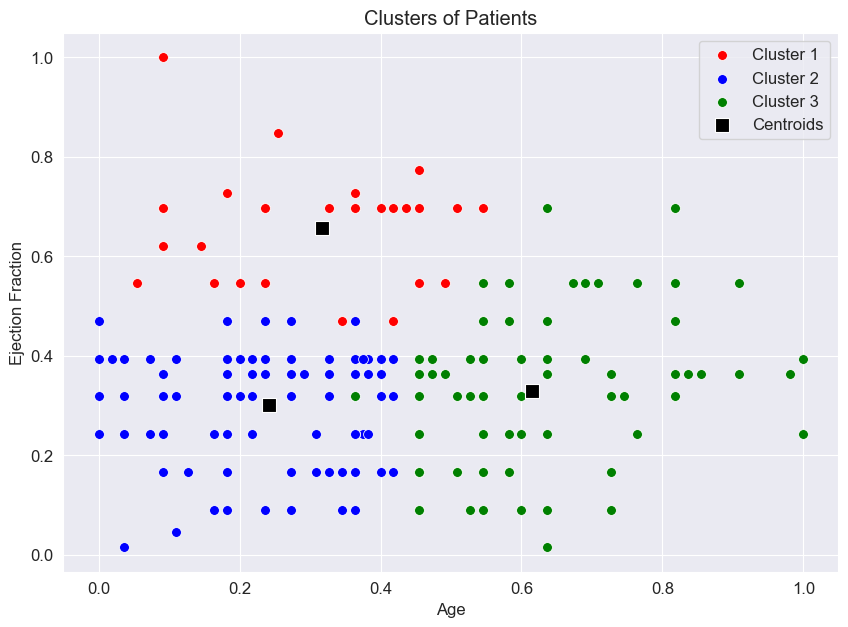

In [9]:
# K = 3 is still best to use due to higher Silhouette Score
# Predict the model using X_train
y_pred_kmeans = kmeans.predict(X_train)

# Plot the scatterplot with centroids to separate the clusters
# This is Age vs. Ejection fraction
sns.scatterplot(x = X_train[y_pred_kmeans == 0, 0], y = X_train[y_pred_kmeans == 0, 1], color = 'red', label = 'Cluster 1', s = 50)
sns.scatterplot(x = X_train[y_pred_kmeans == 1, 0], y = X_train[y_pred_kmeans == 1, 1], color = 'blue', label = 'Cluster 2', s = 50)
sns.scatterplot(x = X_train[y_pred_kmeans == 2, 0], y = X_train[y_pred_kmeans == 2, 1], color = 'green', label = 'Cluster 3', s = 50)
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1], color = 'Black',
                label = 'Centroids', s = 100, marker = ',')
plt.title('Clusters of Patients')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.show()

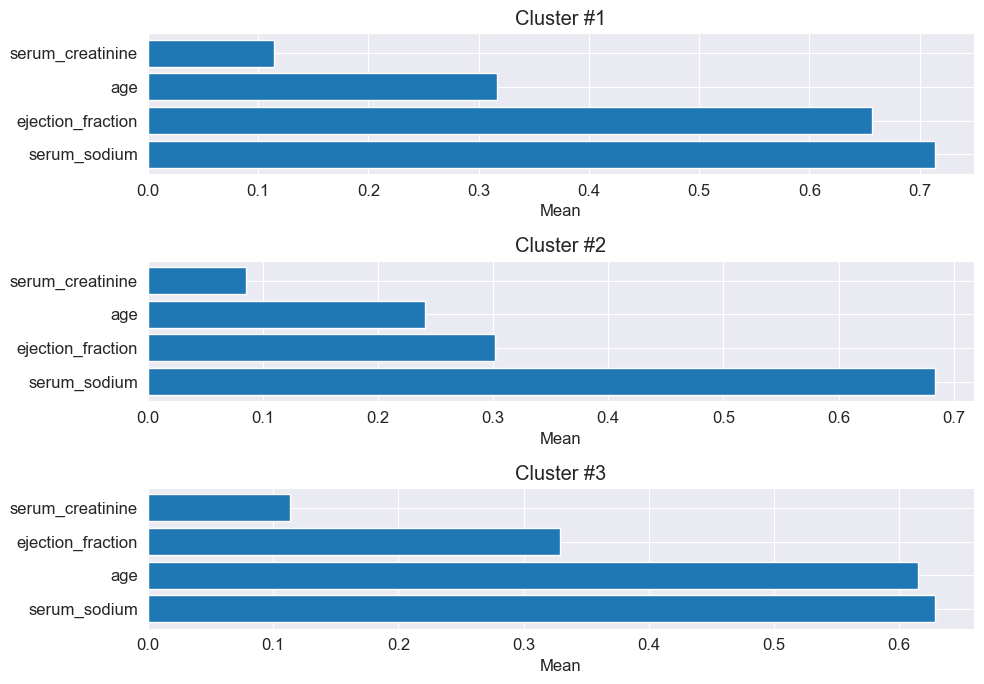

In [10]:
# Plot a bar graph to see all features vs. mean value for each clusters
# Run a loop for 3 clusters
for i in range(3):
    # Get data values from each clusters into Pandas Dataframe
    clust_vals = pd.DataFrame(X_train[y_pred_kmeans == i])
    
    # Get the mean for each feature
    mean = clust_vals.mean(axis = 0)
    
    # Sort the mean values from largest to smallest
    sort = mean.sort_values(ascending = False)
    
    # Plot a bar graph
    plt.subplot(3, 1, i + 1)
    plt.barh(range(len(sort)), sort.values)
    plt.title(f"Cluster #{i + 1}")
    plt.xlabel("Mean")
    plt.yticks(range(len(sort)), X.columns[sort.index])
    
# Avoid overlapping
plt.tight_layout()
plt.show()

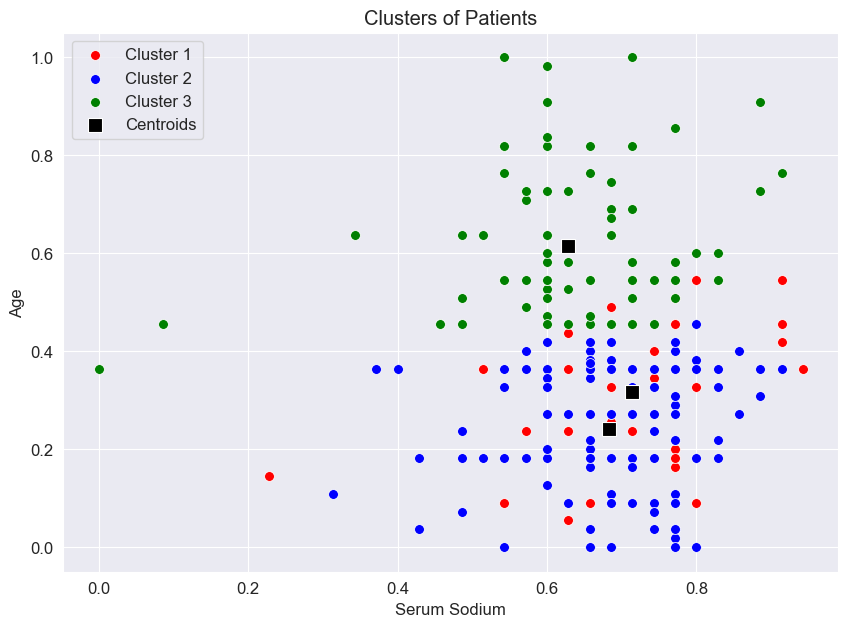

In [11]:
# Based on the bar graph, lets see the clusters for serum_sodium vs. age
# Plot the scatterplot of serum_sodium vs. age
sns.scatterplot(x = X_train[y_pred_kmeans == 0, 3], y = X_train[y_pred_kmeans == 0, 0], color = 'red', label = 'Cluster 1', s = 50)
sns.scatterplot(x = X_train[y_pred_kmeans == 1, 3], y = X_train[y_pred_kmeans == 1, 0], color = 'blue', label = 'Cluster 2', s = 50)
sns.scatterplot(x = X_train[y_pred_kmeans == 2, 3], y = X_train[y_pred_kmeans == 2, 0], color = 'green', label = 'Cluster 3', s = 50)
sns.scatterplot(x = kmeans.cluster_centers_[:, 3], y = kmeans.cluster_centers_[:, 0], color = 'black',
                label = 'Centroids', s = 100, marker = ',')
plt.xlabel('Serum Sodium')
plt.ylabel('Age')
plt.title('Clusters of Patients')
plt.legend()
plt.show()

In [12]:
# Evaluate our Kmeans model using the testing data.
# Predictions
predict_kmeans = kmeans.predict(X_test)

# Print the output
print(confusion_matrix(y_test, predict_kmeans))
print(classification_report(y_test, predict_kmeans))

[[ 9 17  9]
 [ 3 13  9]
 [ 0  0  0]]
              precision    recall  f1-score   support

           0       0.75      0.26      0.38        35
           1       0.43      0.52      0.47        25
           2       0.00      0.00      0.00         0

    accuracy                           0.37        60
   macro avg       0.39      0.26      0.29        60
weighted avg       0.62      0.37      0.42        60



In [13]:
# Before we move onto Hierarchical clustering, its probably better to use PCA
# Importing PCA
from sklearn.decomposition import PCA

# Using n_components = 2
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X_train) 
X_pca = pd.DataFrame(X_pca) 
X_pca.columns = ['P1', 'P2'] 

# Call .head() to return first 5 data values
X_pca.head()

,P1,P2
0,0.236964,-0.341185
1,0.266788,-0.028751
2,-0.009568,-0.124635
3,-0.173980,-0.119082
4,0.603556,-0.031657


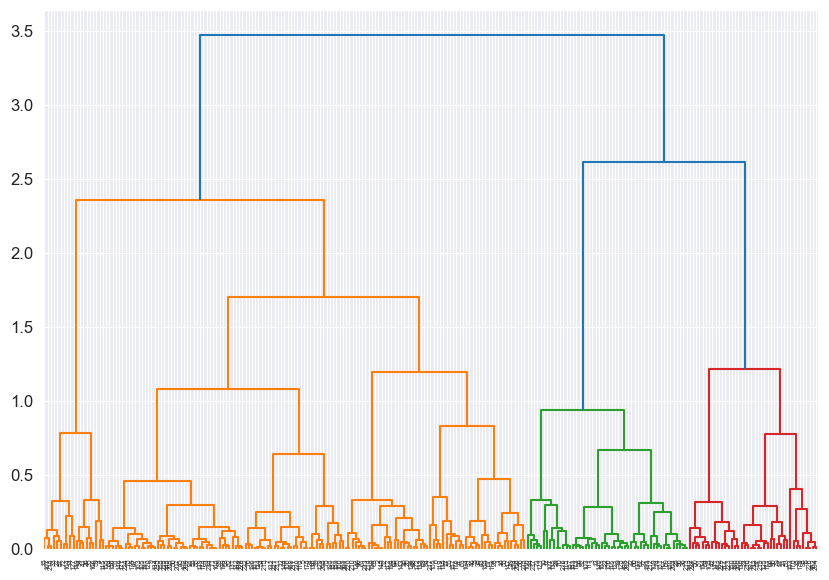

In [14]:
# Importing scipy.cluster.hierarchy
# Lets display a dendrogram to visual the clusters, then I will find the optimal k cluster
import scipy.cluster.hierarchy as shc
den = shc.dendrogram((shc.linkage(X_pca, method = 'ward')))

In [15]:
# According to the dendrogram, it seem k = 2 is optimal if we cut at height of 3
# Now lets do Hierarchical clustering by using Agglomerative Clustering way

# Check to see if k = 2 is optimal based on the Silhouette Score
agg = AgglomerativeClustering(n_clusters = 2)
y_pred_agg = agg.fit_predict(X_pca)
sil_score = silhouette_score(X_pca, y_pred_agg)
print('The Silhouette Score for when k = 2: ', sil_score)

# Do for k = 3
agg3 = AgglomerativeClustering(n_clusters = 3)
y_pred_agg3 = agg3.fit_predict(X_pca)
sil_score3 = silhouette_score(X_pca, y_pred_agg3)
print('The Silhouette Score for when k = 3: ', sil_score3)

# Do for k = 4
agg4 = AgglomerativeClustering(n_clusters = 4)
y_pred_agg4 = agg4.fit_predict(X_pca)
sil_score4 = silhouette_score(X_pca, y_pred_agg4)
print('The Silhouette Score for when k = 4: ', sil_score4)

# Do for k = 5
agg5 = AgglomerativeClustering(n_clusters = 5)
y_pred_agg5 = agg5.fit_predict(X_pca)
sil_score5 = silhouette_score(X_pca, y_pred_agg5)
print('The Silhouette Score for when k = 5: ', sil_score5)

The Silhouette Score for when k = 2:  0.3129331194389901
The Silhouette Score for when k = 3:  0.3120975217083934
The Silhouette Score for when k = 4:  0.3308556396163617
The Silhouette Score for when k = 5:  0.3251491129223905


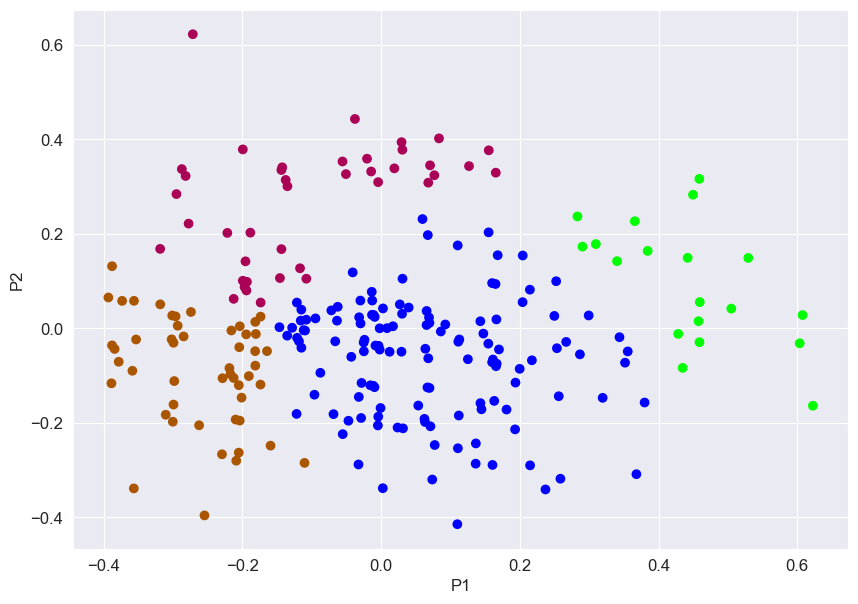

In [16]:
# K = 4 is optimal due to higher Silhouette Score
# Plot the scatterplot to see the clusters
plt.scatter(X_pca['P1'], X_pca['P2'], c = y_pred_agg4, cmap = 'brg')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()

In [17]:
# Evaluate our Agglomerative clustering model using the testing data.
# Fit the model using test data
X_pca_test = pca.fit_transform(X_test)

# Predictions
predict_agg = agg4.fit_predict(X_pca_test)

# Print the output
print(confusion_matrix(y_test, predict_agg))
print(classification_report(y_test, predict_agg))

[[16 10  9  0]
 [ 9  9  3  4]
 [ 0  0  0  0]
 [ 0  0  0  0]]
              precision    recall  f1-score   support

           0       0.64      0.46      0.53        35
           1       0.47      0.36      0.41        25
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.42        60
   macro avg       0.28      0.20      0.24        60
weighted avg       0.57      0.42      0.48        60



In [18]:
# Now lets starting doing DBSCAN method
# Find the optimal values of eps and min_samples based on the Silhouette Score
db = DBSCAN(eps = 0.4, min_samples = 2, metric = 'euclidean')
db.fit(X_train)
y_pred_db = db.fit_predict(X_train)
sil_score_db = silhouette_score(X_train, y_pred_db)
print('The Silhouette Score for eps = 0.2 & min_samples = 2: ', sil_score_db)

# eps = 0.3 and min_samples = 2
db2 = DBSCAN(eps = 0.3, min_samples = 2, metric = 'euclidean')
db2.fit(X_train)
y_pred_db2 = db2.fit_predict(X_train)
sil_score_db2 = silhouette_score(X_train, y_pred_db2)
print('The Silhouette Score for eps = 0.3 & min_samples = 2: ', sil_score_db2)

# eps = 0.3 and min_samples = 3
db3 = DBSCAN(eps = 0.3, min_samples = 3, metric = 'euclidean')
db3.fit(X_train)
y_pred_db3 = db3.fit_predict(X_train)
sil_score_db3 = silhouette_score(X_train, y_pred_db3)
print('The Silhouette Score for eps = 0.3 & min_samples = 3: ', sil_score_db3)

The Silhouette Score for eps = 0.2 & min_samples = 2:  0.5550391594671896
The Silhouette Score for eps = 0.3 & min_samples = 2:  0.40963801808556116
The Silhouette Score for eps = 0.3 & min_samples = 3:  0.474742429294866


In [19]:
# eps = 0.4 and min_samples = 2 is the best to use due to higher silhouette value
# Access the labels
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

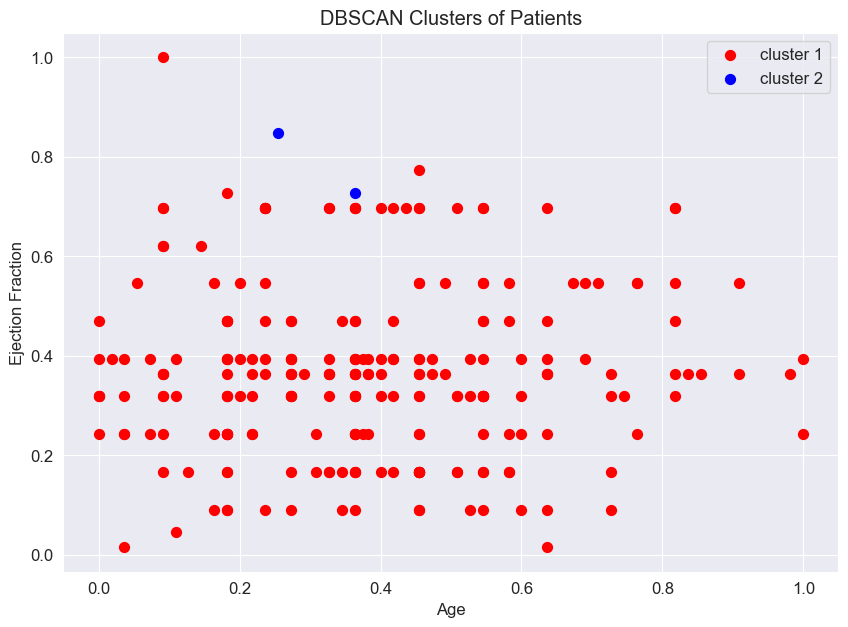

In [21]:
# Plot the DBSCAN clusters
# Scatterplot of age vs. ejection_fraction
plt.scatter(X_train[y_pred_db == 0, 0], X_train[y_pred_db == 0, 1], s = 50, c = 'red', label = 'cluster 1')
plt.scatter(X_train[y_pred_db == 1, 0], X_train[y_pred_db == 1, 1], s = 50, c = 'blue', label = 'cluster 2')
plt.title('DBSCAN Clusters of Patients')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.show()

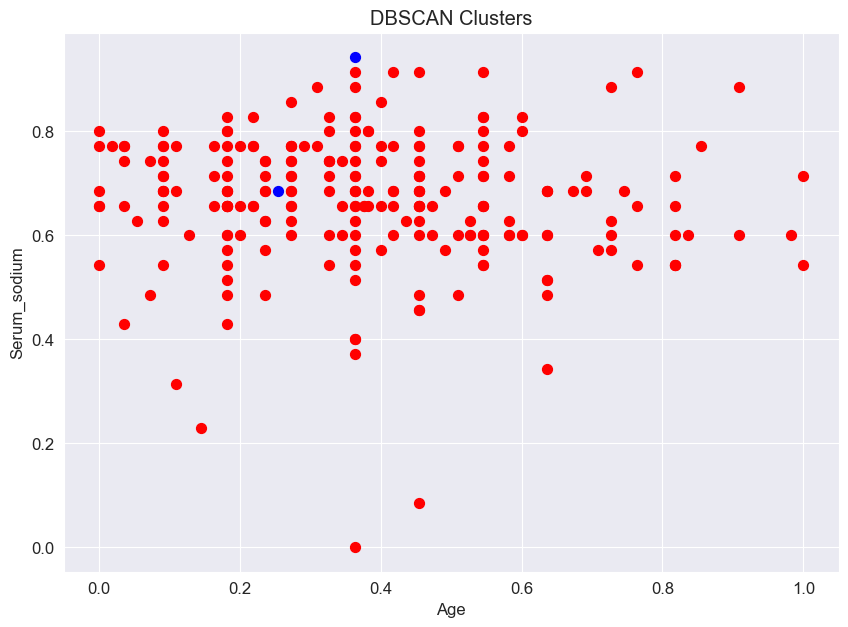

In [22]:
# Plot the DBSCAN clusters
# Scatterplot of age vs. serum_sodium
plt.scatter(X_train[y_pred_db == 0, 0], X_train[y_pred_db == 0, 3], s = 50, c = 'red', label = 'cluster 1')
plt.scatter(X_train[y_pred_db == 1, 0], X_train[y_pred_db == 1, 3], s = 50, c = 'blue', label = 'cluster 2')
plt.title('DBSCAN Clusters')
plt.xlabel('Age')
plt.ylabel('Serum_sodium')
plt.show()

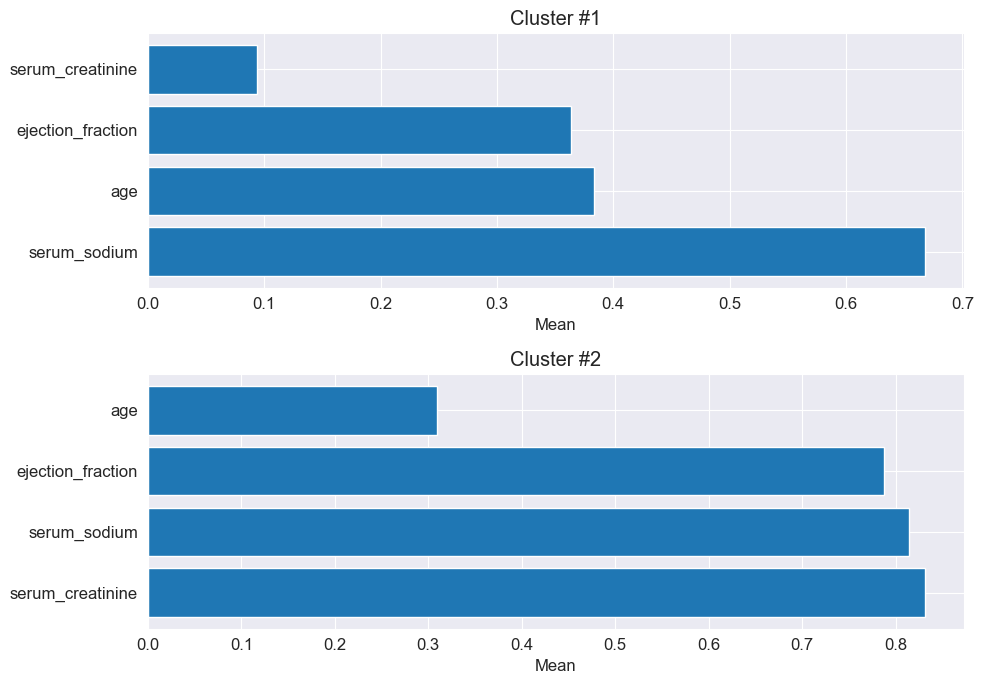

In [23]:
# Plot a bar graph to see all features vs. mean value for each clusters
# Run a loop for 2 clusters
for i in range(2):
    # Get data values from each clusters into Pandas Dataframe
    clust_vals_db = pd.DataFrame(X_train[y_pred_db == i])
    
    # Get the mean for each feature
    mean_db = clust_vals_db.mean(axis = 0)
    
    # Sort the mean values from largest to smallest
    sort_db = mean_db.sort_values(ascending = False)
    
    # Plot a bar graph
    plt.subplot(2, 1, i + 1)
    plt.barh(range(len(sort_db)), sort_db.values)
    plt.title(f"Cluster #{i + 1}")
    plt.xlabel("Mean")
    plt.yticks(range(len(sort_db)), X.columns[sort_db.index])
    
# Avoid overlapping
plt.tight_layout()
plt.show()

In [24]:
# Evaluate our Agglomerative clustering model using the testing data.
# Predictions
predict_db = db.fit_predict(X_test)

# Print the output
print(confusion_matrix(y_test, predict_db))
print(classification_report(y_test, predict_db))

[[ 0  0  0]
 [ 0 35  0]
 [ 1 24  0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.59      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.20      0.33      0.25        60
weighted avg       0.35      0.58      0.43        60



In [25]:
# Lets compare all model by their accuracy score and see which one has the best performance.
# Importing accuracy score
from sklearn.metrics import accuracy_score

# Print the accuracy scores
print('Accuracy Score for KMeans while k = 3: {0:0.4f}'.format(accuracy_score(y_test, predict_kmeans)))
print('Accuracy Score for Agglomerative Clustering while k = 4: {0:0.4f}'.format(accuracy_score(y_test, predict_agg)))
print('Accuracy Score for DBSCAN with 2 clusters: {0:0.4f}'.format(accuracy_score(y_test, predict_db)))

Accuracy Score for KMeans while k = 3: 0.3667
Accuracy Score for Agglomerative Clustering while k = 4: 0.4167
Accuracy Score for DBSCAN with 2 clusters: 0.5833


In [26]:
# Lets compare all model by their best silhouette score and see which one has the best overall score

# KMeans using test data
kmeans.fit_predict(X_test)
km_sil_score = silhouette_score(X_test, kmeans.labels_)
print('Silhouette Score for KMeans: {0:0.4f}'.format(km_sil_score))

# Agglomerative Clustering using test data
y_pred_agg4 = agg4.fit_predict(X_pca_test)
sil_score4 = silhouette_score(X_pca_test, y_pred_agg4)
print('Silhouette Score for Agglomerative Clustering: {0:0.4f}'.format(sil_score4))

# DBSCAN using test data
db.fit(X_test)
y_pred_db = db.fit_predict(X_test)
sil_score_db = silhouette_score(X_test, y_pred_db)
print('Silhouette Score for DBSCAN: {0:0.4f}'.format(sil_score_db))

Silhouette Score for KMeans: 0.3108
Silhouette Score for Agglomerative Clustering: 0.3945
Silhouette Score for DBSCAN: 0.5898


In this task, I cluster the patients using the 3 methods, which are KMeans, hierarchical clustering, and DBSCAN. Before I do any clustering algorithm, I scaled the data using MinMaxScaler, which I used for logistic regression before, and I believe it will help to keep our data values close to each other. I split the data into 80% of training and 20% of testing. For the KMeans clustering algorithm, I have k = 3 as my optimal k value because using the elbow method helped me to find it, and it has the highest silhouette score. I plot a scatterplot of age vs. ejection fraction to see the clusters of patients. I see that cluster 1 has a high ejection fraction, cluster 3 has higher age, and cluster 2 is low in both of these values. I also plotted a bar graph to see the distribution of each cluster's features based on their mean values. This helps me to see the top features that have the most in common by order. For cluster 1, I have serum sodium, ejection_fraction, age, and serum_creatinine. My cluster 2 is the same as cluster 1 but has lower overall mean values. We can say that cluster 2 is a younger group of patients. For cluster 3, I have serum_sodium, age, ejection_fraction, and serum_creatinine. Moving onto hierarchical clustering, I used PCA while n_components is 2. Then I have k = 4 as my optimal k value because it has the best silhouette score. I plotted a scatterplot of P1 vs. P2 features and displayed 4 clusters. Furthermore, for the DBSCAN method, I have eps = 0.4 and min_samples = 2 as my optimal values due to the highest silhouette score. I plotted a scatterplot of age vs. ejection_fraction and showed 2 clusters. However, from looking that the scatterplot, I have a cluster that only has 2 points. So I plotted another scatterplot, but this time is age vs. serum_sodium. After comparing 2 scatterplots, it shows that certain clusters seem to have low age values. Therefore, I plot a bar graph to see the mean value for each cluster's features, and yes it showed that cluster 2 is very low in age value. 

I compare the accuracy scores for each method using the testing data. I have 36.67% for KMeans, 41.67% for agglomerative clustering, and 58.33% for DBSCAN. It turns out that DBSCAN has the best accuracy. Then I also compare the silhouette score for each method. DBSCAN is still the best, which is a score of 58.98%, while KMeans have 31.08% and Agglomerative clustering has 39.45%. The pros and cons of different methods are that KMeans are easy to use and work well on a large dataset, but they are sensitive to outliers. Hierarchical clusterings are effective because we can put our data into a dendrogram and visualize the cluster structure. Also, robust to noise and outliers. However, it is slow for large datasets. DBSCAN can handle noise data and does not need to determine the number of clusters beforehand like KMeans did. The downside for DBSCAN is sensitive to choosing an esp value and min_samples value. I do not think it is possible for me to determine whether my clustering results match the true clusters, which this task is unsupervised learning. However, I compared the accuracy and silhouette score for each method, and DBSCAN is the best overall.